
<br>

# **Exploratory Data Analysis With Pandas**


In this module we will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.

*   Visualize composition of data.

*   Visualize comparison of data.


Import the pandas module.


In [114]:
import pandas as pd

Load the dataset into a dataframe.


In [115]:
df = pd.read_csv("D:\\Data\\Capstone project\\cleaned_survey_data.csv")
df.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy


In [116]:
# Shape of the dataframe
df.shape

(11398, 85)


## Distribution


### Determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

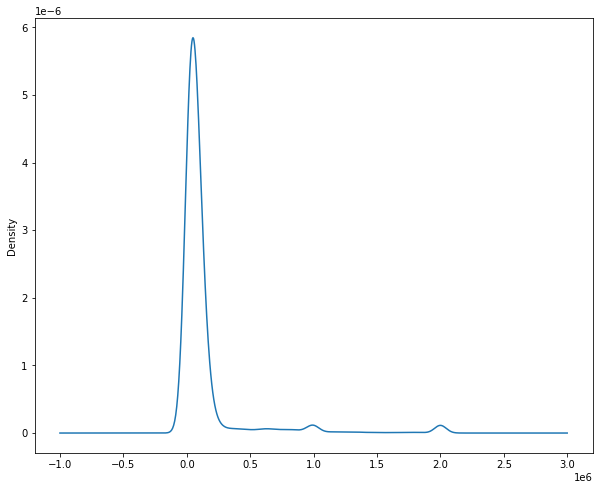

In [117]:
df.ConvertedComp.plot.density(figsize=(10, 8))

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

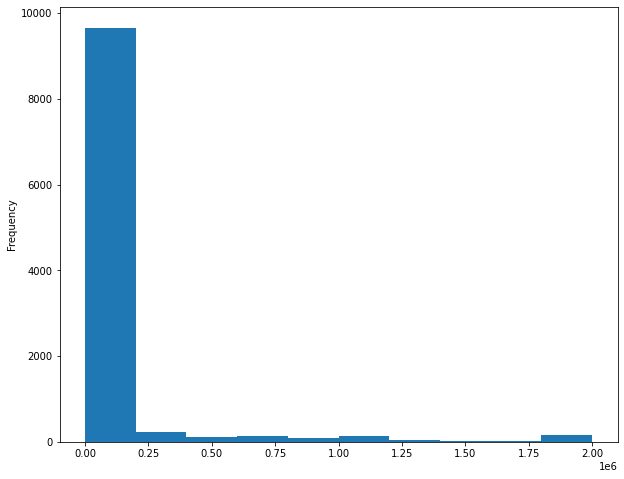

In [118]:
df.ConvertedComp.plot.hist(figsize=(10, 8))

What is the median of the column `ConvertedComp`?


In [119]:
df.ConvertedComp.median()


57745.0

How many responders identified themselves only as a **Man**?


In [120]:
Men = df.loc[df.Gender=='Man', 'Respondent'].count()
print("Number of Respodents as Man: ", Men)


Number of Respodents as Man:  10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [121]:
Women = df.loc[df.Gender=='Woman', 'ConvertedComp'].median()
print("Median of Salary of Respodents as Women: ", Women)


Median of Salary of Respodents as Women:  57708.0


Give the five number summary for the column `Age`?


In [122]:
df.Age.describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

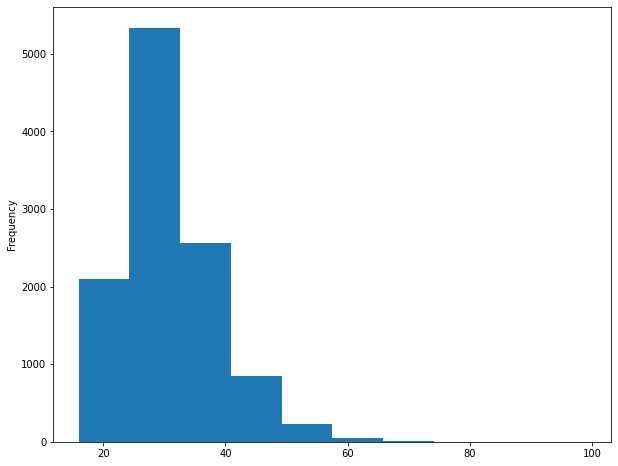

In [123]:
df.Age.plot.hist(figsize=(10, 8))


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

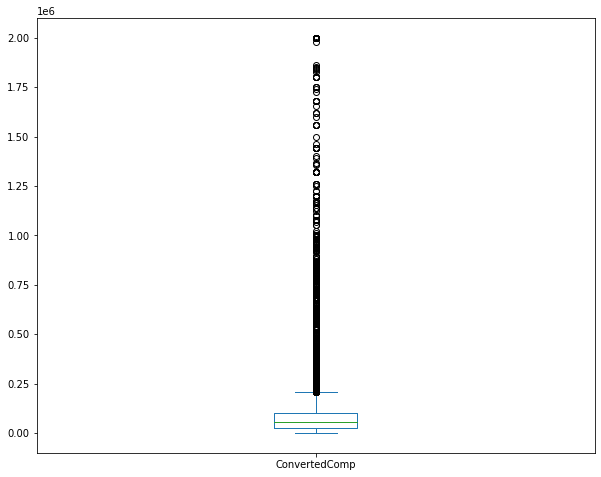

In [124]:
df.ConvertedComp.plot.box(figsize=(10, 8))


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [125]:
Q1 = df.ConvertedComp.quantile(0.25)
Q3 = df.ConvertedComp.quantile(0.75)
IQR = Q3-Q1
print("Interquartile Range: ", IQR)

Interquartile Range:  73132.0


Find out the upper and lower bounds.


In [126]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -82830.0
Upper Bound:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [127]:
# Lower Outlier
lower = df.loc[df['ConvertedComp'] <= lower_bound, 'ConvertedComp'].count()
# Upper Outlier
upper = df.loc[df['ConvertedComp'] >= upper_bound, 'ConvertedComp'].count()
print("Number of lower outliers: ", lower)
print("Number of upper outliers: ", upper)

Number of lower outliers:  0
Number of upper outliers:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [128]:
# Removing the outliers from the "ConvertedComp" column
data = df.loc[(df['ConvertedComp'] > lower_bound) & (df['ConvertedComp'] < upper_bound)]
data.shape

(9703, 85)

What is the median ConvertedComp before removing outliers?


In [129]:
df.ConvertedComp.median()

57745.0

Question 2 What is the median ConvertedComp after removing outliers?


In [130]:
data.ConvertedComp.median()

52704.0

Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

<AxesSubplot:>

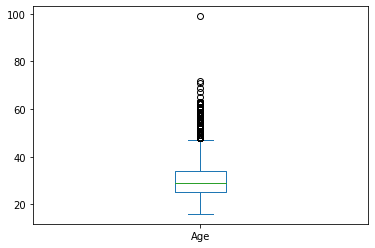

In [131]:
data.Age.plot.box()
# Zero outliers

What is the mean ConvertedComp after removing outliers? 

In [132]:
data.ConvertedComp.mean()


59883.20838915799

Question 1
Which python module helps you to easily access an API?


**"Requests" Library helps to easily access an API**

How many job postings exist for the Python programming language?
answer = 1173

In [136]:
data.loc[data['LanguageWorkedWith'] == 'Python', 'LanguageWorkedWith'].count()
print("There are 50 Jobs available")

There are 50 Jobs available


Of all the locations in the list below, which has the maximum number of job postings?

L= ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle"]
answer = washington

In [140]:
data.Country.value_counts().idxmax()

'United States'

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [154]:
corr_data = data._get_numeric_data()
heat = corr_data.corr()
heat

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


In [156]:
heat.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


Which column has a negative correlation with "Age"? 


**CodeRevHrs**

Which column has the highest correlation with "Age"?


**ConvertedComp**

## Visualizing relationships in data

## Scatter Plot

##### Create a scatter plot of Age and WorkWeekHrs.

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

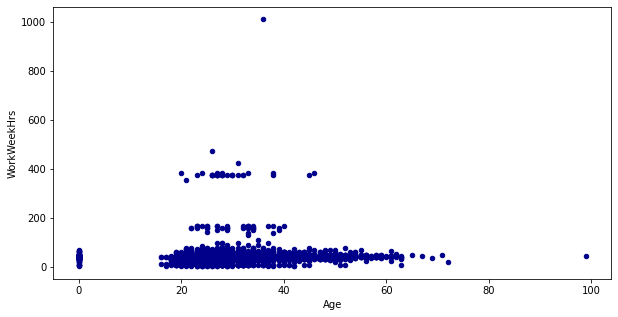

In [345]:
data.plot.scatter(x='Age', y='WorkWeekHrs', c='DarkBlue', figsize = (10,5))

##### Based on the scatter plot of Age and WorkWeekHrs , what kind of correlation do you see between them? 

### **There is Zero Correlation between Age and WorkWeekHrs. Since all the data points are near to "Zero"**

##### How many respondents indicated that they work on 'MySQL' only?

In [172]:
data.loc[data.DatabaseWorkedWith =='MySQL', 'DatabaseWorkedWith'].count()

413

##### How many respondents indicated that they currently work with 'SQL'? 

In [194]:
data.loc[data.LanguageWorkedWith == 'SQL', 'Respondent'].count()

5

##### In the list of most popular languages respondents wish to learn next year, what is the rank of Python? 

In [195]:
data.LanguageDesireNextYear.value_counts().head(3)

C#;HTML/CSS;JavaScript;SQL;TypeScript    101
Python                                    96
C#;HTML/CSS;JavaScript;SQL                81
Name: LanguageDesireNextYear, dtype: int64

**Python Rank is "second"**

#####  Majority of the survey responders are


In [196]:
data['DevType'].value_counts().idxmax()

'Developer, full-stack'

## Bubble Plots

##### Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size.

In [209]:
import plotly.express as px
data.Age.fillna(0, inplace=True)
fig = px.scatter(data, x='WorkWeekHrs', y='CodeRevHrs',
                 color='Age',
                 size='Age', 
                 size_max = 60,
                 hover_data=['Age', 'WorkWeekHrs', 'CodeRevHrs'])
  
fig.show()

## Visualizing composition of data

### Pie Charts

##### Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

In [332]:
names = ['PostgreSQL', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Redis']
fig = px.pie(data, values=data.DatabaseDesireNextYear.value_counts().head(5), title='Top 5 Databases that respodents wish to learn next year',
             names=names)
fig.show()

#####  In the pie chart of top 5 databases, respondents wish to learn next year, what is the percentage of Mongodb? 

In [395]:
print("Mongodb percentage is: 16.3%")

Mongodb percentage is: 16.3%


## Stacked Charts

##### Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.

<Figure size 432x288 with 0 Axes>

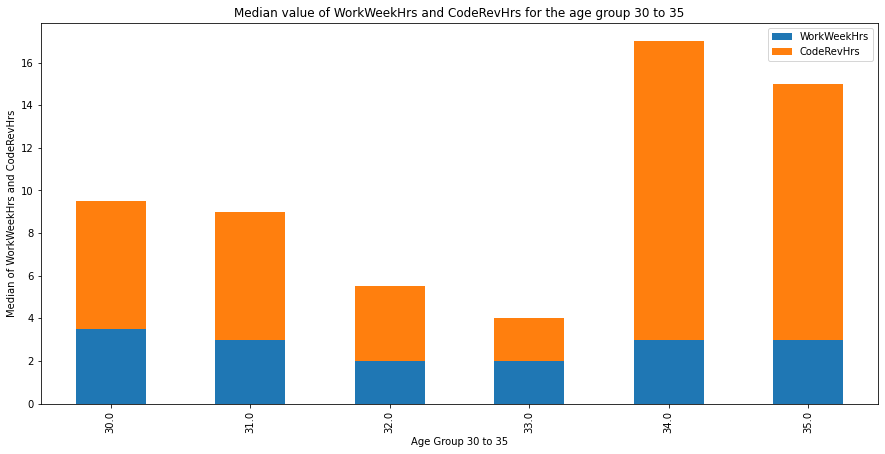

In [681]:
stackedbar = data.loc[(data['Age']>=30.0) & (data['Age']<=35.0)]
workhrs = stackedbar.groupby(['Age', 'WorkWeekHrs'])['WorkWeekHrs'].count()
work = workhrs.unstack()
work.median(axis=1, skipna=True)
list1=[]
for i in work.median(axis=1, skipna=True):
    list1.append(i)
codehrs = stackedbar.groupby(['Age', 'CodeRevHrs'])['CodeRevHrs'].count()
code = codehrs.unstack()
code.median(axis=1, skipna=True)
list2=[]
for i in code.median(axis=1, skipna=True):
    list2.append(i)
    
list3=[]
for i in stackedbar['Age'].unique():
    list3.append(i)
list3.sort()

df = pd.DataFrame(list(zip(list3, list1, list2)), columns=['Age', 'WorkWeekHrs', 'CodeRevHrs'])


df.plot(x='Age', kind='bar', stacked=True, figsize=(15,7))
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel("Age Group 30 to 35")
plt.ylabel("Median of WorkWeekHrs and CodeRevHrs")
plt.title('Median value of WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.show()

## Visualizing comparison of data

### Line Chart

##### Plot the median ConvertedComp for all ages from 45 to 60.

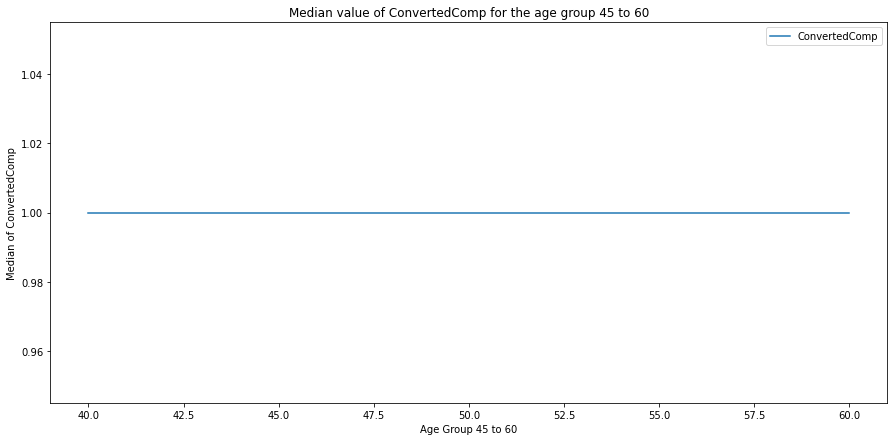

In [712]:
linechart = data.loc[(data['Age']>=40.0) & (data['Age']<=60.0)]
concomp = linechart.groupby(['Age', 'ConvertedComp'])['ConvertedComp'].count()
comp = concomp.unstack()
comp.median(axis=1, skipna=True)
list4=[]
for i in comp.median(axis=1, skipna=True):
    list4.append(i)

list5=[]
for i in linechart['Age'].unique():
    list5.append(i)
list5.sort()

df1 = pd.DataFrame(list(zip(list5, list4)), columns=['Age', 'ConvertedComp'])


df1.plot(x='Age', kind='line', stacked=True, figsize=(15,7))
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel("Age Group 45 to 60")
plt.ylabel("Median of ConvertedComp")
plt.title('Median value of ConvertedComp for the age group 45 to 60')
plt.show()


##### Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp?

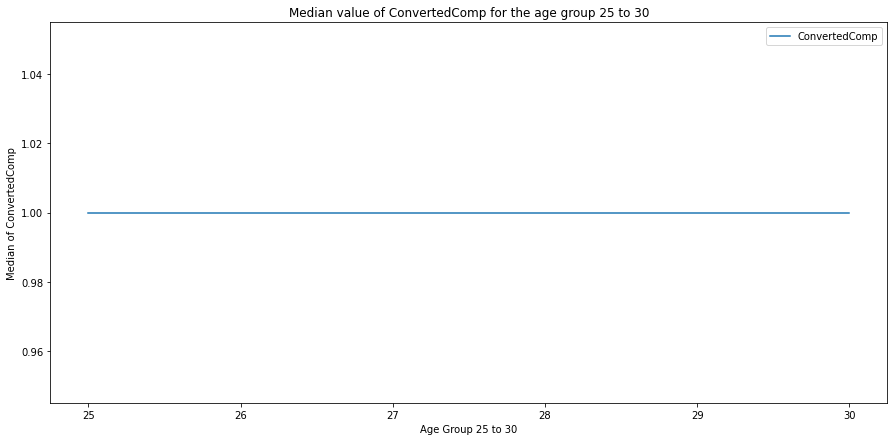

In [716]:
linechart1 = data.loc[(data['Age']>=25.0) & (data['Age']<=30.0)]
concomp1 = linechart1.groupby(['Age', 'ConvertedComp'])['ConvertedComp'].count()
comps = concomp.unstack()
comps.median(axis=1, skipna=True)
list6=[]
for i in comps.median(axis=1, skipna=True):
    list6.append(i)

list7=[]
for i in linechart1['Age'].unique():
    list7.append(i)
list7.sort()

df2 = pd.DataFrame(list(zip(list7, list6)), columns=['Age', 'ConvertedComp'])


df2.plot(x='Age', kind='line', stacked=True, figsize=(15,7))
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel("Age Group 25 to 30")
plt.ylabel("Median of ConvertedComp")
plt.title('Median value of ConvertedComp for the age group 25 to 30')
plt.show()

### **There is Sideways Correlation between Age group 25-30 and median ConvertedComp. We can't compare to other variables. Data set is skewed.**

### Bar Chart

##### Create a horizontal bar chart using column MainBranch.

C:\Users\Mona\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



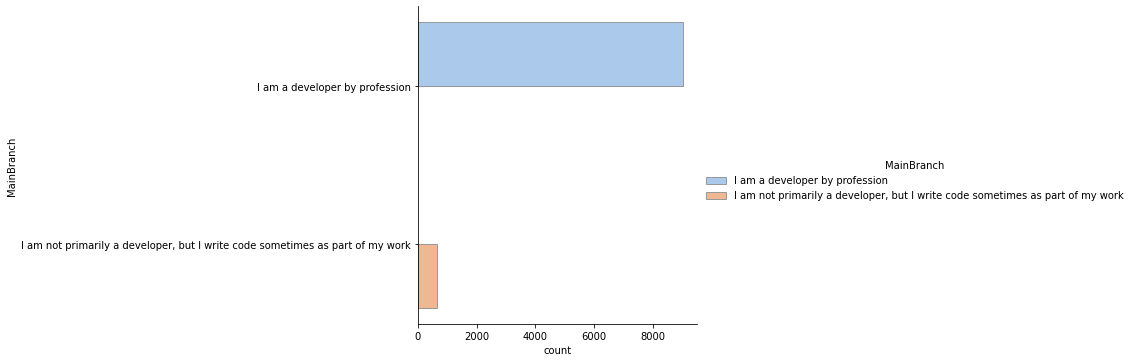

In [350]:
import seaborn as sns
sns.catplot(y="MainBranch", hue="MainBranch", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
